# LSTM 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Master_thesis/master_thesis_collab

/content/drive/MyDrive/Colab Notebooks/Master_thesis/master_thesis_collab


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions_2_ as fun
import deep_learning_helper as dp
import keras
import tensorflow as tf
import sklearn

%load_ext autoreload
%autoreload 2

from keras import models
from tensorflow.keras import layers

# Load the data 

In [ ]:
# load the dataset
dataset = pd.read_csv('training_data.csv')
# dropp unncecassary columns
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dataset.head()

,epoch_utc,emission_factor,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,...,DK_import,DK_export,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export
0,1.546297e+09,298.240217,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,...,901.0,0.0,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0
1,1.546301e+09,266.522473,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,...,316.0,0.0,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0
2,1.546304e+09,262.594215,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,...,0.0,405.0,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0
3,1.546308e+09,260.190772,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,...,0.0,619.0,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0
4,1.546312e+09,250.496683,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,...,0.0,689.0,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0


In [ ]:
dataset.columns

Index(['epoch_utc', 'emission_factor', 'datetime_de', 'windon_forecast',
       'windoff_forecast', 'solar_forecast', 'prices_forecast',
       'aggregated_generation_forecast', 'AT_import', 'AT_export', 'CZ_import',
       'CZ_export', 'DK_import', 'DK_export', 'LU_import', 'LU_export',
       'NL_import', 'NL_export', 'PL_import', 'PL_export', 'CH_import',
       'CH_export'],
      dtype='object')

In [ ]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Split dataset int targe = co2 emisssions and features

# get co2 emissions
co2 = dataset['emission_factor']

# get features
cols_features = [c for c in dataset.columns if c != 'emission_factor']
cols = {c: i for i, c in enumerate(dataset.columns)}
indices = {ind: i for i, ind in enumerate(dataset.index)}
features = dataset.loc[:, [j for j in cols if j != 'emission_factor' and j in cols_features]]

In [ ]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#co2 = scaler.fit_transform(np.array(co2).reshape(1, -1))
#features = scaler.fit_transform(features)

In [ ]:
# check co2 data
co2.head()

0    298.240217
1    266.522473
2    262.594215
3    260.190772
4    250.496683
Name: emission_factor, dtype: float64

In [ ]:
# check features
features.head()

,epoch_utc,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,...,DK_import,DK_export,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export
0,1.546297e+09,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,...,901.0,0.0,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0
1,1.546301e+09,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,...,316.0,0.0,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0
2,1.546304e+09,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,...,0.0,405.0,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0
3,1.546308e+09,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,...,0.0,619.0,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0
4,1.546312e+09,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,...,0.0,689.0,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0


## Feature Enginnering

### Create lagged features

In [ ]:
# create 26 laggs of the co2 emission factor

co2_lag = fun.make_lags(co2, lags = 125)
co2_lag = co2_lag.fillna(0.0)
co2_lag.head()

,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,y_lag_7,y_lag_8,y_lag_9,y_lag_10,...,y_lag_116,y_lag_117,y_lag_118,y_lag_119,y_lag_120,y_lag_121,y_lag_122,y_lag_123,y_lag_124,y_lag_125
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,298.240217,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,266.522473,298.240217,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,262.594215,266.522473,298.240217,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,260.190772,262.594215,266.522473,298.240217,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# add lag 24 and 26 to the features

features[['co2_24_lag', 'co2_26_lag']] = co2_lag[['y_lag_24','y_lag_26']].set_index(features.index)
features.head()

,epoch_utc,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,...,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export,co2_24_lag,co2_26_lag
0,1.546297e+09,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,...,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0,0.0,0.0
1,1.546301e+09,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,...,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0,0.0,0.0
2,1.546304e+09,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,...,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0,0.0,0.0
3,1.546308e+09,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,...,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0,0.0,0.0
4,1.546312e+09,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,...,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0,0.0,0.0


In [ ]:
features.columns

Index(['epoch_utc', 'datetime_de', 'windon_forecast', 'windoff_forecast',
       'solar_forecast', 'prices_forecast', 'aggregated_generation_forecast',
       'AT_import', 'AT_export', 'CZ_import', 'CZ_export', 'DK_import',
       'DK_export', 'LU_import', 'LU_export', 'NL_import', 'NL_export',
       'PL_import', 'PL_export', 'CH_import', 'CH_export', 'co2_24_lag',
       'co2_26_lag'],
      dtype='object')

### Create temproal features

In [ ]:
# get datetime type timestemps from fetures
date =pd.to_datetime(features.datetime_de)

In [ ]:
# one hot encoding of timestemps of features

features['hour_of_day'] = date.dt.hour # get hour of the given day
features['day_of_week'] = date.dt.weekday # get day of current weak
features['hour_of_year'] = ((date.dt.dayofyear-1) * 24) + date.dt.hour # get hour of current year
features = features.drop(columns=['datetime_de', 'epoch_utc']) # drop the timestemps
features.head()

,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,DK_import,...,NL_export,PL_import,PL_export,CH_import,CH_export,co2_24_lag,co2_26_lag,hour_of_day,day_of_week,hour_of_year
0,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,569.0,901.0,...,1354.0,224.0,0.0,0.0,800.0,0.0,0.0,23,0,8759
1,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,694.0,316.0,...,1158.0,0.0,0.0,1.0,801.0,0.0,0.0,0,1,0
2,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,685.0,0.0,...,1176.0,0.0,0.0,0.0,800.0,0.0,0.0,1,1,1
3,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,1186.0,0.0,...,1428.0,0.0,0.0,0.0,800.0,0.0,0.0,2,1,2
4,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,1122.0,0.0,...,1492.0,0.0,0.0,0.0,800.0,0.0,0.0,3,1,3


In [ ]:
features['day_of_week'].replace({0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri', 5: 'sat', 6: 'sun'}, inplace=True)
features = pd.get_dummies(features, columns=['day_of_week'])
features.head()

,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,DK_import,...,co2_26_lag,hour_of_day,hour_of_year,day_of_week_fri,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,569.0,901.0,...,0.0,23,8759,0,1,0,0,0,0,0
1,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,694.0,316.0,...,0.0,0,0,0,0,0,0,0,1,0
2,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,685.0,0.0,...,0.0,1,1,0,0,0,0,0,1,0
3,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,1186.0,0.0,...,0.0,2,2,0,0,0,0,0,1,0
4,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,1122.0,0.0,...,0.0,3,3,0,0,0,0,0,1,0


In [ ]:
# transform hourly features into ciclical data

features_temp = ['hour_of_day', 'hour_of_year']
corr_numbers = [24, 8760]# hours in a day and hours in a year
for f, n in zip(features_temp, corr_numbers):
    features[f + '_sin'] = np.sin(features[f]*(2.*np.pi/n))
    features[f + '_cos'] = np.cos(features[f]*(2.*np.pi/n))
features.drop(columns=features_temp, inplace=True)
features.head()

,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,DK_import,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
0,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,569.0,901.0,...,1,0,0,0,0,0,-0.258819,0.965926,-0.000717,1.000000
1,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,694.0,316.0,...,0,0,0,0,1,0,0.000000,1.000000,0.000000,1.000000
2,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,685.0,0.0,...,0,0,0,0,1,0,0.258819,0.965926,0.000717,1.000000
3,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,1186.0,0.0,...,0,0,0,0,1,0,0.500000,0.866025,0.001435,0.999999
4,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,1122.0,0.0,...,0,0,0,0,1,0,0.707107,0.707107,0.002152,0.999998


In [ ]:
#features = features.drop(columns= ['day_of_week_mon','day_of_week_tue', 'day_of_week_wed', 'day_of_week_thu', 'day_of_week_fri'])
#features.head()

In [ ]:
#name_co2 = 'emission_factor'
name_feauters = features.columns

In [ ]:
scaler_co2 = MinMaxScaler(feature_range=(0, 1))
scaler_features = MinMaxScaler(feature_range=(0, 1))
co2 = scaler_co2.fit_transform(np.array(co2).reshape(len(co2),1))
features = scaler_features.fit_transform(features)

In [ ]:
co2 = pd.DataFrame(co2)
co2 = co2.rename({0:'emission_factor'}, axis = 1)
co2.head()

,emission_factor
0,0.227725
1,0.178708
2,0.172638
3,0.168923
4,0.153942


In [ ]:
features = pd.DataFrame(features, columns = name_feauters)
features.head()

,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,DK_import,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
0,0.446242,0.747480,0.0,0.149783,0.403693,0.013757,0.657002,0.336566,0.184740,0.258537,...,1.0,0.0,0.0,0.0,0.0,0.0,0.370590,0.982963,0.499641,1.000000
1,0.487884,0.743516,0.0,0.126682,0.408244,0.013532,0.674691,0.160776,0.225325,0.090674,...,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.000000,0.500000,1.000000
2,0.529102,0.741478,0.0,0.108771,0.406600,0.004511,0.569757,0.000000,0.222403,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.629410,0.982963,0.500359,1.000000
3,0.569081,0.733956,0.0,0.101391,0.416452,0.000677,0.568294,0.034720,0.385065,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.750000,0.933013,0.500717,0.999999
4,0.602922,0.723507,0.0,0.104556,0.433248,0.000000,0.659795,0.000000,0.364286,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.853553,0.853553,0.501076,0.999999


## Creation of LSTM

### Train Test Split

In [ ]:
# define the percentage of the train set
train_ratio = 0.7
val_ratio = 0.9
n = len(co2)#
assert(n == len(features))

# split the target into train and test set
co2_train = co2[0:int(n*train_ratio)+1]
co2_train_val = co2[0:int(n*val_ratio)]
co2_val = co2[int(n*train_ratio)+1:int(n*val_ratio)+1]
co2_test = co2[int(n*val_ratio)+1:n-23]

# split the features into train and test set
features_train = features[0:int(n*train_ratio)+1]
features_train_val = features[0:int(n*val_ratio)]
features_val = features[int(n*train_ratio)+1:int(n*val_ratio)+1]
features_test = features[int(n*val_ratio)+1:n-23]

# split the date data
date_val = date[int(n*train_ratio)+1:int(n*val_ratio)+1]
date_test = date[int(n*val_ratio)+1:n-23]

assert( len(co2_train) == len(features_train))
assert( len(co2_train_val) == len(features_train_val))
assert( len(co2_val) == len(features_val))
assert( len(co2_test) == len(features_test))

In [ ]:
#get number of features
n_features = len(features.columns)
print(n_features)

32


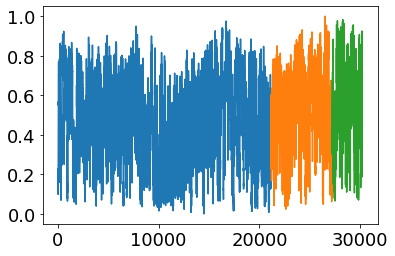

In [ ]:
# check the train test split by plotting both

plt.plot(co2_train)
plt.plot(co2_val)
plt.plot(co2_test)
plt.show()

### Create walk forward split

In [ ]:
n_val = co2_val.shape[0]
val_split = 8
val_len = n_val // val_split
assert( n_val % val_split == 0)
print('This is the length of the validation data set:', n_val)
print('This is the number of validation splits:', val_split)
print('This is the length of one validation split:', val_len)

This is the length of the validation data set: 6048
This is the number of validation splits: 8
This is the length of one validation split: 756


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
# get object that contains split indexes accorcing to the test lenght and the forecast period

#define forecast period
forecast_period = 24
tscv_val = TimeSeriesSplit(gap = 0, test_size= val_len, n_splits = val_split)
tscv_test = TimeSeriesSplit(gap = 0, test_size= forecast_period, n_splits = int(len(co2_test)/forecast_period))

In [ ]:
for train_index, test_index in tscv_val.split(co2_train_val):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = co2.values[train_index], co2.values[test_index]

TRAIN: [    0     1     2 ... 21164 21165 21166] TEST: [21167 21168 21169 21170 21171 21172 21173 21174 21175 21176 21177 21178
 21179 21180 21181 21182 21183 21184 21185 21186 21187 21188 21189 21190
 21191 21192 21193 21194 21195 21196 21197 21198 21199 21200 21201 21202
 21203 21204 21205 21206 21207 21208 21209 21210 21211 21212 21213 21214
 21215 21216 21217 21218 21219 21220 21221 21222 21223 21224 21225 21226
 21227 21228 21229 21230 21231 21232 21233 21234 21235 21236 21237 21238
 21239 21240 21241 21242 21243 21244 21245 21246 21247 21248 21249 21250
 21251 21252 21253 21254 21255 21256 21257 21258 21259 21260 21261 21262
 21263 21264 21265 21266 21267 21268 21269 21270 21271 21272 21273 21274
 21275 21276 21277 21278 21279 21280 21281 21282 21283 21284 21285 21286
 21287 21288 21289 21290 21291 21292 21293 21294 21295 21296 21297 21298
 21299 21300 21301 21302 21303 21304 21305 21306 21307 21308 21309 21310
 21311 21312 21313 21314 21315 21316 21317 21318 21319 21320 21321 21

In [ ]:
co2_train_val.shape, co2_test.shape, co2.shape, co2_val.shape

((27215, 1), (3000, 1), (30239, 1), (6048, 1))

In [ ]:
# check the number of splits for the forward validation
tscv_val.get_n_splits(), tscv_test.get_n_splits()

(8, 125)

In [ ]:
# check if the tscv splits align with the test data set
assert(tscv_val.get_n_splits() == co2_val.shape[0] / val_len)
assert(tscv_test.get_n_splits() == co2_test.shape[0] / forecast_period)

# Define the Neural Network

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout, Flatten
from keras.layers import LeakyReLU
import keras.backend as K
from keras.layers import LSTM
#### Todos:
# add probabiltic prediction
# LSTM dropout
# kernel regulizer
# second lstm
# recurrend regulizer
# activity reululizer
# normalization
gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

#### Reshape the data for LSTM input

In [ ]:
co2_train_val.shape, features_train_val.shape

((27215, 1), (27215, 32))

In [ ]:
co2_df = pd.DataFrame(co2)
co2_df.head()

,emission_factor
0,0.227725
1,0.178708
2,0.172638
3,0.168923
4,0.153942


In [ ]:
features_df = pd.DataFrame(features)
features_df.head()

,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,DK_import,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
0,0.446242,0.747480,0.0,0.149783,0.403693,0.013757,0.657002,0.336566,0.184740,0.258537,...,1.0,0.0,0.0,0.0,0.0,0.0,0.370590,0.982963,0.499641,1.000000
1,0.487884,0.743516,0.0,0.126682,0.408244,0.013532,0.674691,0.160776,0.225325,0.090674,...,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.000000,0.500000,1.000000
2,0.529102,0.741478,0.0,0.108771,0.406600,0.004511,0.569757,0.000000,0.222403,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.629410,0.982963,0.500359,1.000000
3,0.569081,0.733956,0.0,0.101391,0.416452,0.000677,0.568294,0.034720,0.385065,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.750000,0.933013,0.500717,0.999999
4,0.602922,0.723507,0.0,0.104556,0.433248,0.000000,0.659795,0.000000,0.364286,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.853553,0.853553,0.501076,0.999999


In [ ]:
df = pd.concat([co2,features], axis = 1)
df.head()

,emission_factor,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
0,0.227725,0.446242,0.747480,0.0,0.149783,0.403693,0.013757,0.657002,0.336566,0.184740,...,1.0,0.0,0.0,0.0,0.0,0.0,0.370590,0.982963,0.499641,1.000000
1,0.178708,0.487884,0.743516,0.0,0.126682,0.408244,0.013532,0.674691,0.160776,0.225325,...,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.000000,0.500000,1.000000
2,0.172638,0.529102,0.741478,0.0,0.108771,0.406600,0.004511,0.569757,0.000000,0.222403,...,0.0,0.0,0.0,0.0,1.0,0.0,0.629410,0.982963,0.500359,1.000000
3,0.168923,0.569081,0.733956,0.0,0.101391,0.416452,0.000677,0.568294,0.034720,0.385065,...,0.0,0.0,0.0,0.0,1.0,0.0,0.750000,0.933013,0.500717,0.999999
4,0.153942,0.602922,0.723507,0.0,0.104556,0.433248,0.000000,0.659795,0.000000,0.364286,...,0.0,0.0,0.0,0.0,1.0,0.0,0.853553,0.853553,0.501076,0.999999


In [ ]:
# define the percentage of the train set
train_ratio = 0.7
val_ratio = 0.9
n = len(df)#
assert(n == len(df))

# split the target into train and test set
df_train = df[0:int(n*train_ratio)]
df_train_val = df[0:int(n*val_ratio)]
df_val = df[int(n*train_ratio):int(n*val_ratio)]
df_test = df[int(n*val_ratio):]


In [ ]:
df_train

,emission_factor,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
0,0.227725,0.446242,0.747480,0.000000,0.149783,0.403693,0.013757,0.657002,0.336566,0.184740,...,1.0,0.0,0.0,0.0,0.0,0.0,0.370590,0.982963,0.499641,1.000000
1,0.178708,0.487884,0.743516,0.000000,0.126682,0.408244,0.013532,0.674691,0.160776,0.225325,...,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.000000,0.500000,1.000000
2,0.172638,0.529102,0.741478,0.000000,0.108771,0.406600,0.004511,0.569757,0.000000,0.222403,...,0.0,0.0,0.0,0.0,1.0,0.0,0.629410,0.982963,0.500359,1.000000
3,0.168923,0.569081,0.733956,0.000000,0.101391,0.416452,0.000677,0.568294,0.034720,0.385065,...,0.0,0.0,0.0,0.0,1.0,0.0,0.750000,0.933013,0.500717,0.999999
4,0.153942,0.602922,0.723507,0.000000,0.104556,0.433248,0.000000,0.659795,0.000000,0.364286,...,0.0,0.0,0.0,0.0,1.0,0.0,0.853553,0.853553,0.501076,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21162,0.567862,0.073396,0.107640,0.117562,0.221706,0.340769,0.196437,0.000000,0.156397,0.163636,...,1.0,0.0,0.0,0.0,0.0,0.0,0.017037,0.370590,0.760178,0.073025
21163,0.618853,0.088803,0.117348,0.033701,0.222795,0.302862,0.228687,0.000000,0.100407,0.233117,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.759872,0.072839
21164,0.618990,0.116635,0.121795,0.002278,0.217731,0.284724,0.175913,0.000000,0.113231,0.227922,...,1.0,0.0,0.0,0.0,0.0,0.0,0.017037,0.629410,0.759565,0.072653
21165,0.594296,0.136518,0.125648,0.000000,0.215073,0.281567,0.009698,0.000000,0.195496,0.211039,...,1.0,0.0,0.0,0.0,0.0,0.0,0.066987,0.750000,0.759259,0.072467


In [ ]:
df_val

,emission_factor,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
21167,0.560395,0.129199,0.129465,0.000000,0.192390,0.199545,0.0,0.091103,0.375352,0.116883,...,1.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.933013,0.758645,0.072095
21168,0.549600,0.121594,0.133244,0.000000,0.188542,0.172555,0.0,0.042559,0.427901,0.102273,...,1.0,0.0,0.0,0.0,0.0,0.0,0.370590,0.982963,0.758338,0.071910
21169,0.547120,0.112445,0.129243,0.000000,0.185453,0.151352,0.0,0.056523,0.336566,0.061688,...,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.000000,0.758031,0.071725
21170,0.560686,0.103565,0.121498,0.000000,0.185112,0.140369,0.0,0.051470,0.382233,0.067208,...,0.0,0.0,0.0,0.0,1.0,0.0,0.629410,0.982963,0.757724,0.071540
21171,0.576382,0.097176,0.111679,0.000034,0.186023,0.149682,0.0,0.044687,0.379105,0.060065,...,0.0,0.0,0.0,0.0,1.0,0.0,0.750000,0.933013,0.757417,0.071355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27210,0.409509,0.702166,0.795724,0.000000,0.329046,0.683090,0.0,0.524139,0.000000,0.129870,...,1.0,0.0,0.0,0.0,0.0,0.0,0.017037,0.370590,0.802242,0.898308
27211,0.417812,0.670978,0.783237,0.000000,0.316591,0.662637,0.0,0.541694,0.000000,0.227273,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.802528,0.898091
27212,0.411933,0.644927,0.816252,0.000000,0.310148,0.634332,0.0,0.563772,0.000000,0.324675,...,1.0,0.0,0.0,0.0,0.0,0.0,0.017037,0.629410,0.802813,0.897874
27213,0.395543,0.623734,0.855454,0.000000,0.278034,0.597359,0.0,0.454183,0.000000,0.577922,...,1.0,0.0,0.0,0.0,0.0,0.0,0.066987,0.750000,0.803099,0.897657


In [ ]:
df_test

,emission_factor,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,CZ_export,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
27215,0.360521,0.597975,0.902994,0.000000,0.243984,0.545786,0.000000,0.473068,0.000000,0.506494,...,1.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.933013,0.803669,0.897222
27216,0.376530,0.596598,0.894768,0.000000,0.268313,0.540275,0.000000,0.456311,0.000000,0.382792,...,1.0,0.0,0.0,0.0,0.0,0.0,0.370590,0.982963,0.803954,0.897004
27217,0.377289,0.613494,0.876056,0.000000,0.255807,0.544786,0.000000,0.508312,0.000000,0.324675,...,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,1.000000,0.804238,0.896786
27218,0.355368,0.632542,0.880539,0.000000,0.250465,0.551889,0.000000,0.486634,0.000000,0.292208,...,0.0,0.0,0.0,0.0,1.0,0.0,0.629410,0.982963,0.804523,0.896567
27219,0.342229,0.650035,0.879317,0.000000,0.246807,0.560057,0.000000,0.410294,0.000000,0.292208,...,0.0,0.0,0.0,0.0,1.0,0.0,0.750000,0.933013,0.804807,0.896349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30234,0.556289,0.326150,0.393879,0.131956,0.376540,0.457673,0.000000,0.130735,0.000000,0.087662,...,1.0,0.0,0.0,0.0,0.0,0.0,0.017037,0.370590,0.658936,0.025933
30235,0.664929,0.264030,0.376241,0.039793,0.398615,0.385542,0.000000,0.008778,0.044417,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.658596,0.025819
30236,0.731719,0.225415,0.359123,0.005310,0.399970,0.294641,0.026161,0.000000,0.133250,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.017037,0.629410,0.658255,0.025706
30237,0.740909,0.208167,0.348044,0.000000,0.396805,0.299232,0.059314,0.000000,0.210197,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.066987,0.750000,0.657915,0.025592


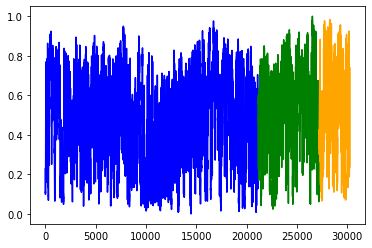

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_train['emission_factor'], color = 'blue')
plt.plot(df_val['emission_factor'], color = 'green')
plt.plot(df_test['emission_factor'], color = 'orange')
plt.show()

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df = df_train, val_df= df_val, test_df= df_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.features_train_df = train_df.drop(label_columns, axis = 1)
    self.target_train_df = pd.DataFrame(train_df[label_columns])
    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(self.features_train_df.columns)}
    self.label_names = {name: i for i, name in
                           enumerate(self.target_train_df.columns)}
    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width +shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size  - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
  def split_window(self, features, target):
      inputs = features[:, self.input_slice, :]
      #inputs.drop(self.label_columns)
      labels = target[:, self.labels_slice, :]
      if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.label_names[name]]for name in self.label_columns],axis=-1)
      # for name in self.label_columns ]
      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
      inputs.set_shape([None, self.input_width, None])
      labels.set_shape([None, self.label_width, None])

      return inputs, labels

def plot(self, plot_col, model=None, max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.label_names[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col}')
    plt.plot(self.input_indices, labels[n, :, plot_col_index],
             label='Target', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')
WindowGenerator.plot = plot

In [ ]:
shift = 0
input_width = 24
label_width = 24

window = WindowGenerator(input_width, label_width,shift, label_columns = ['emission_factor'])
window

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label column name(s): ['emission_factor']

In [ ]:
for name in window.label_columns:
    print(name)

emission_factor


In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(df_train[:window.total_window_size]),
                           np.array(df_train[100:100+window.total_window_size]),
                           np.array(df_train[200:200+window.total_window_size])])

example_features = tf.stack([np.array(features_train[:window.total_window_size]),
                           np.array(features_train[100:100+window.total_window_size]),
                           np.array(features_train[200:200+window.total_window_size])])

example_co2 = tf.stack([np.array(co2_train[:window.total_window_size]),
                           np.array(co2_train[100:100+window.total_window_size]),
                           np.array(co2_train[200:200+window.total_window_size])])

example_co2 = tf.reshape(example_co2, shape = (3,24,1))
print(example_co2.shape)

# data shape
co2_copy = tf.reshape(co2[:len(co2)-23], shape = (int(len(co2[:len(co2)-23])/24),24,1))
features_copy = tf.reshape(features[:len(co2)-23], shape = (int(len(co2[:len(co2)-23])/24),24,32))

# train shape##
co2_copy_train = tf.reshape(co2_train, shape = (int(len(co2_train)/24),24,1))
features_copy_train = tf.reshape(features_train, shape = (int(len(co2_train)/24),24,32))

# validation shape
co2_copy_val = tf.reshape(co2_val, shape = (int(len(co2_val)/24),24,1))
features_copy_val = tf.reshape(features_val, shape = (int(len(co2_val)/24),24,32))

# train val shape
#co2_copy_train_val = tf.reshape(co2_train_val, shape = (int(len(co2_train_val)/24),24,1))
#features_copy_train_val = tf.reshape(features_train_val, shape = (int(len(co2_train_val)/24),24,32))
                                                          
# test shape
co2_copy_test = tf.reshape(co2_test, shape = (int(len(co2_test)/24),24,1))
features_copy_test = tf.reshape(features_test, shape = (int(len(co2_test)/24),24,32))

inputs, labels = window.split_window(features_copy, co2_copy)
inputs_train, labels_train = window.split_window(features_copy_train, co2_copy_train)
inputs_val, labels_val = window.split_window(features_copy_val, co2_copy_val)
inputs_test, labels_test = window.split_window(features_copy_test, co2_copy_test)
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {inputs.shape}')
print(f'Labels shape: {labels.shape}')
print(f'Inputs train shape: {inputs_train.shape}')
print(f'Labels train shape: {labels_train.shape}')
print(f'Inputs vali shape: {inputs_val.shape}')
print(f'Labels vali shape: {labels_val.shape}')
print(f'Inputs test shape: {inputs_test.shape}')
print(f'Labels test shape: {labels_test.shape}')



(3, 24, 1)
All shapes are: (batch, time, features)
Window shape: (3, 24, 33)
Inputs shape: (1259, 24, 32)
Labels shape: (1259, 24, 1)
Inputs train shape: (882, 24, 32)
Labels train shape: (882, 24, 1)
Inputs vali shape: (252, 24, 32)
Labels vali shape: (252, 24, 1)
Inputs test shape: (125, 24, 32)
Labels test shape: (125, 24, 1)


In [ ]:
# train_val set
labels_train_val = tf.concat([labels_train, labels_val], axis = 0)
print(labels_train_val.shape)

inputs_train_val = tf.concat([inputs_train, inputs_val], axis = 0)
print(inputs_train_val.shape)

(1134, 24, 1)
(1134, 24, 32)


In [ ]:
n_val = labels_val.shape[0]
val_split = 9
val_len = n_val // val_split
assert( n_val % val_split == 0)
print('This is the length of the validation data set:', n_val)
print('This is the number of validation splits:', val_split)
print('This is the length of one validation split:', val_len)

This is the length of the validation data set: 252
This is the number of validation splits: 9
This is the length of one validation split: 28


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
# get object that contains split indexes accorcing to the test lenght and the forecast period

#define forecast period
forecast_period = 24
tscv_val = TimeSeriesSplit(gap = 0, test_size= val_len, n_splits = val_split)
tscv_test = TimeSeriesSplit(gap = 0, test_size= 1, n_splits = labels_test.shape[0]-1)

In [ ]:
window.example = inputs_train, labels_train

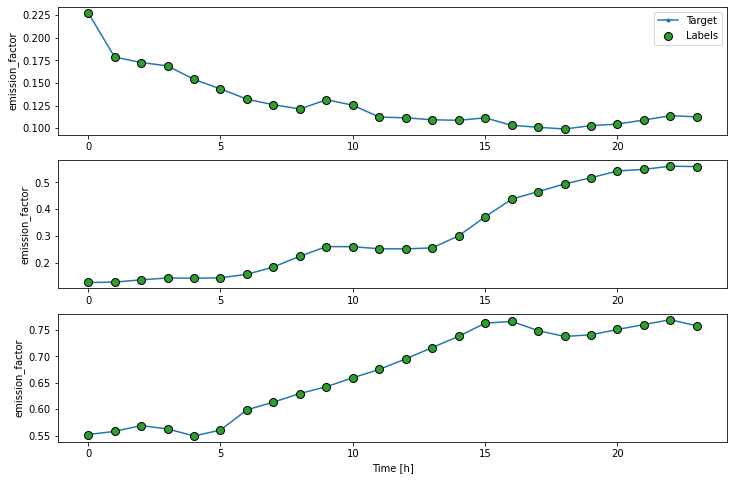

In [ ]:
window.plot(plot_col = 'emission_factor')

In [4]:
learning_rate = 0.001
loss = 'mse'
optimizer = 'adam'
#activation = 'relu'
dp_rate = 0.8
metrics=[tf.keras.metrics.RootMeanSquaredError()]
initializer_lstm = tf.keras.initializers.GlorotNormal()
#initializer_lstm = tf.keras.initializers.GlorotNormal(seed=42)
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
#initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)

In [5]:
lstm_model = dp.LSTM_model(32, loss, optimizer, dp_rate, initializer_lstm)

In [7]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 1250)          6415000   
                                                                 
 dense (Dense)               (None, 24, 32)            40032     
                                                                 
 dropout (Dropout)           (None, 24, 32)            0         
                                                                 
 dense_1 (Dense)             (None, 24, 128)           4224      
                                                                 
 dense_2 (Dense)             (None, 24, 1)             129       
                                                                 
Total params: 6,459,385
Trainable params: 6,459,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 5.0 MB/s 


In [ ]:
from PIL import ImageFont

In [ ]:
tf.keras.utils.plot_model(lstm_model, to_file='lstm.svg', show_shapes=True, show_layer_names=True, show_layer_activations=True,expand_nested=False,show_dtype=False,)

ValueError: ignored

In [ ]:
import visualkeras
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', 32)
visualkeras.graph_view(lstm_model)

AttributeError: ignored

Walk forward Validation

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor = 'loss',
    verbose = 0,
    patience = 15,
    mode = 'auto',
    restore_best_weights = True
)

In [ ]:
alpha_low = 0.025
alpha_high = 0.975
print('with PI', alpha_high - alpha_low)
prediction_step = 9
n = 1

with PI 0.95


In [ ]:
lower_val, pred_val, upper_val, report_val = dp.walk_forward_deep_learning_lstm(labels_train_val, inputs_train_val,  labels_val, scaler_co2, alpha_low, alpha_high, n_features, n, prediction_step, callback, learning_rate, loss, optimizer, dp_rate = dp_rate, initializer = initializer_lstm, epochs = 100, batch_size = 32, method = 'lstm', refit = True, validation =True )
print(report_val)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
29/29 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0056
Epoch 85/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0068
Epoch 86/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0038 - val_loss: 0.0057
Epoch 87/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0088
Epoch 88/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0066
Epoch 89/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0068
Epoch 90/100
29/29 [==============================] - 0s 9ms/step - loss: 0.0038 - val_loss: 0.0059
Epoch 91/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0038 - val_loss: 0.0061
Epoch 92/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0038 - val_loss: 0.0055
Epoch 93/100
29/29 [==================

In [ ]:
lstm_val_report_01 = open("/content/drive/MyDrive/Colab Notebooks/Master_thesis/master_thesis_collab/lstm_val_report_01.txt", 'w')
lstm_val_report_01.write(report_val)
lstm_val_report_01.close()

In [ ]:
co2_val = scaler_co2.inverse_transform([np.array(co2_val).reshape(len(co2_val),)])

In [ ]:
co2_val = pd.DataFrame(co2_val).T
co2_val

,0
0,506.521267
1,504.916659
2,513.695182
3,523.851760
4,540.933495
...,...
6043,421.243254
6044,417.438725
6045,406.833526
6046,390.330244


In [ ]:
pred_val_df = pd.DataFrame(pred_val)
pred_val_df.to_csv('best_lstm_mean_wf_val.csv')
pred_val_df.head() 

,0
0,525.619949
1,518.280435
2,528.170539
3,529.496013
4,557.424879


In [ ]:
upper_val_df = pd.DataFrame(upper_val)
upper_val_df.to_csv('best_lstm_upper_wf_val.csv')
upper_val_df

,0
0,568.525045
1,569.857920
2,575.078317
3,593.704141
4,624.607982
...,...
6043,435.338544
6044,435.612897
6045,432.999905
6046,432.994680


In [ ]:
lower_val_df = pd.DataFrame(lower_val)
lower_val_df.to_csv('best_lstm_lower_wf_val.csv')
lower_val_df

,0
0,483.921077
1,475.441963
2,472.098403
3,477.639422
4,497.219887
...,...
6043,348.476069
6044,346.488732
6045,324.112371
6046,319.630494


In [ ]:
date_val

21168   2021-05-31 23:00:00+00:00
21169   2021-06-01 00:00:00+00:00
21170   2021-06-01 01:00:00+00:00
21171   2021-06-01 02:00:00+00:00
21172   2021-06-01 03:00:00+00:00
                   ...           
27211   2022-02-07 18:00:00+00:00
27212   2022-02-07 19:00:00+00:00
27213   2022-02-07 20:00:00+00:00
27214   2022-02-07 21:00:00+00:00
27215   2022-02-07 22:00:00+00:00
Name: datetime_de, Length: 6048, dtype: datetime64[ns, UTC]

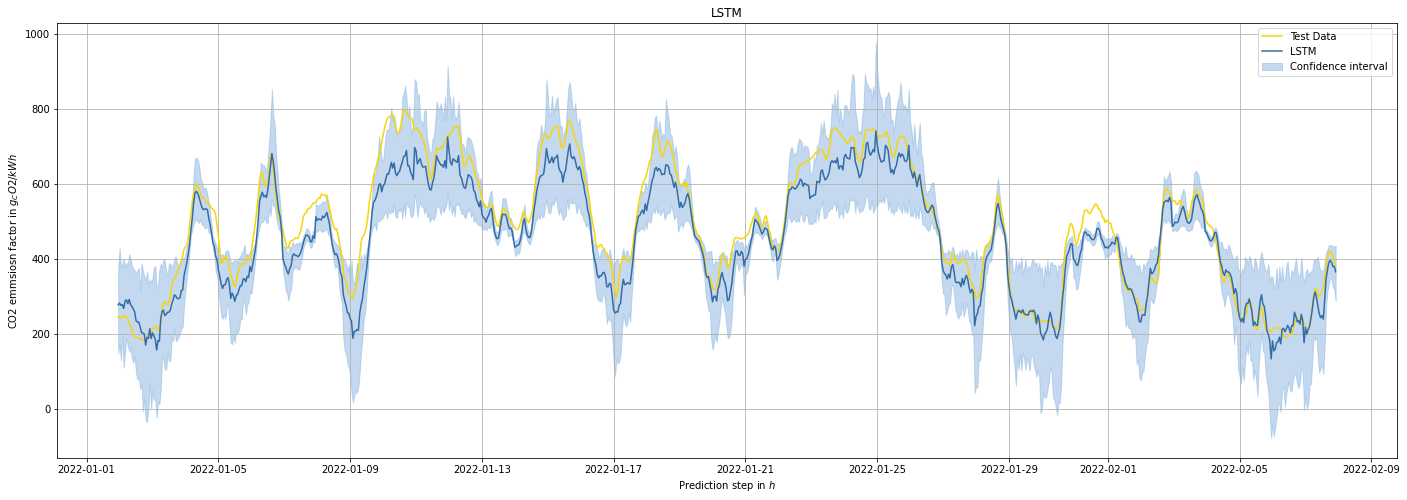

In [ ]:
fun.plot_model_uncertainty(co2_val, pred_val_df,lower_val_df ,upper_val_df, date_val, slice_start = '2022-01-01 23:00', slice_end =  '2022-02-15 23:00' , method = 'LSTM')

# walk forward testing

In [ ]:
learning_rate = 0.001
loss = 'mse'
optimizer = 'adam'
#activation = 'relu'
dp_rate = 0.8
metrics=[tf.keras.metrics.RootMeanSquaredError()]
initializer_lstm = tf.keras.initializers.GlorotNormal()
#initializer_lstm = tf.keras.initializers.GlorotNormal(seed=42)
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
#initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)

NameError: ignored

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor = 'loss',
    verbose = 0,
    patience = 15,
    mode = 'auto',
    restore_best_weights = True
)

In [ ]:
alpha_low = 0.025
alpha_high = 0.975
print('with PI', alpha_high - alpha_low)
prediction_step = 1
n = 1

with PI 0.95


In [ ]:
labels_train.shape, labels_val.shape, labels_test.shape, labels.shape

(TensorShape([882, 24, 1]),
 TensorShape([252, 24, 1]),
 TensorShape([125, 24, 1]),
 TensorShape([1259, 24, 1]))

In [ ]:
lower_test, pred_test, upper_test, report_test = dp.walk_forward_deep_learning_lstm(labels, inputs,  labels_test, scaler_co2, alpha_low, alpha_high, n_features, n, prediction_step, callback, learning_rate, loss, optimizer, dp_rate = dp_rate, initializer = initializer_lstm, epochs = 100, batch_size = 32, method = 'lstm', refit = True, validation = False )
print(report_test)

Streaming output truncated to the last 5000 lines.
39/39 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 74/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 75/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 76/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 77/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 78/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 79/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 80/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 81/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 82/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 83/100
39/39 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 84/100
39/39 [==============================] - 0s 7ms/step - los

In [ ]:
lstm_test_report_01 = open("/content/drive/MyDrive/Colab Notebooks/Master_thesis/master_thesis_collab/lstm_test_report_04.txt", 'w')
lstm_test_report_01.write(report_test)
lstm_test_report_01.close()

In [ ]:
co2_test = scaler_co2.inverse_transform([np.array(co2_test).reshape(len(co2_test),)])

In [ ]:
co2_test = pd.DataFrame(co2_test).T
co2_test

,0
0,394.529970
1,395.021625
2,380.836436
3,372.334296
4,365.007369
...,...
2995,576.282153
2996,607.169623
2997,615.671089
2998,610.579118


In [ ]:
pred_test_df = pd.DataFrame(pred_test)
pred_test_df.to_csv('best_lstm_mean_wf_test4.csv')
pred_test_df.head() 

,0
0,326.385781
1,351.522227
2,345.750364
3,342.203779
4,343.344737


In [ ]:
upper_test_df = pd.DataFrame(upper_test)
upper_test_df.to_csv('best_lstm_upper_wf_test4.csv')
upper_test_df

,0
0,398.630034
1,414.947345
2,420.671494
3,427.908631
4,408.273434
...,...
2995,660.769089
2996,703.982509
2997,720.885598
2998,722.344570


In [ ]:
lower_test_df = pd.DataFrame(lower_test)
lower_test_df.to_csv('best_lstm_lower_wf_test4.csv')
lower_test_df

,0
0,245.664723
1,257.549422
2,279.669149
3,270.105598
4,256.906832
...,...
2995,505.005522
2996,517.655473
2997,514.541798
2998,512.654841


In [ ]:
date_val

21168   2021-05-31 23:00:00+00:00
21169   2021-06-01 00:00:00+00:00
21170   2021-06-01 01:00:00+00:00
21171   2021-06-01 02:00:00+00:00
21172   2021-06-01 03:00:00+00:00
                   ...           
27211   2022-02-07 18:00:00+00:00
27212   2022-02-07 19:00:00+00:00
27213   2022-02-07 20:00:00+00:00
27214   2022-02-07 21:00:00+00:00
27215   2022-02-07 22:00:00+00:00
Name: datetime_de, Length: 6048, dtype: datetime64[ns, UTC]

In [ ]:
pred_test_df = pd.read_csv('best_lstm_mean_wf_test4.csv')

In [ ]:
pred_test_df = pred_test_df.drop(columns='Unnamed: 0')
pred_test_df.head()

,0
0,326.385781
1,351.522227
2,345.750364
3,342.203779
4,343.344737


In [ ]:
lower_test_df = pd.read_csv('best_lstm_lower_wf_test4.csv')

In [ ]:
lower_test_df = lower_test_df.drop(columns='Unnamed: 0')
lower_test_df.head()

,0
0,245.664723
1,257.549422
2,279.669149
3,270.105598
4,256.906832


In [ ]:
upper_test_df = pd.read_csv('best_lstm_upper_wf_test4.csv')

In [ ]:
upper_test_df = upper_test_df.drop(columns='Unnamed: 0')
upper_test_df.head()

,0
0,398.630034
1,414.947345
2,420.671494
3,427.908631
4,408.273434


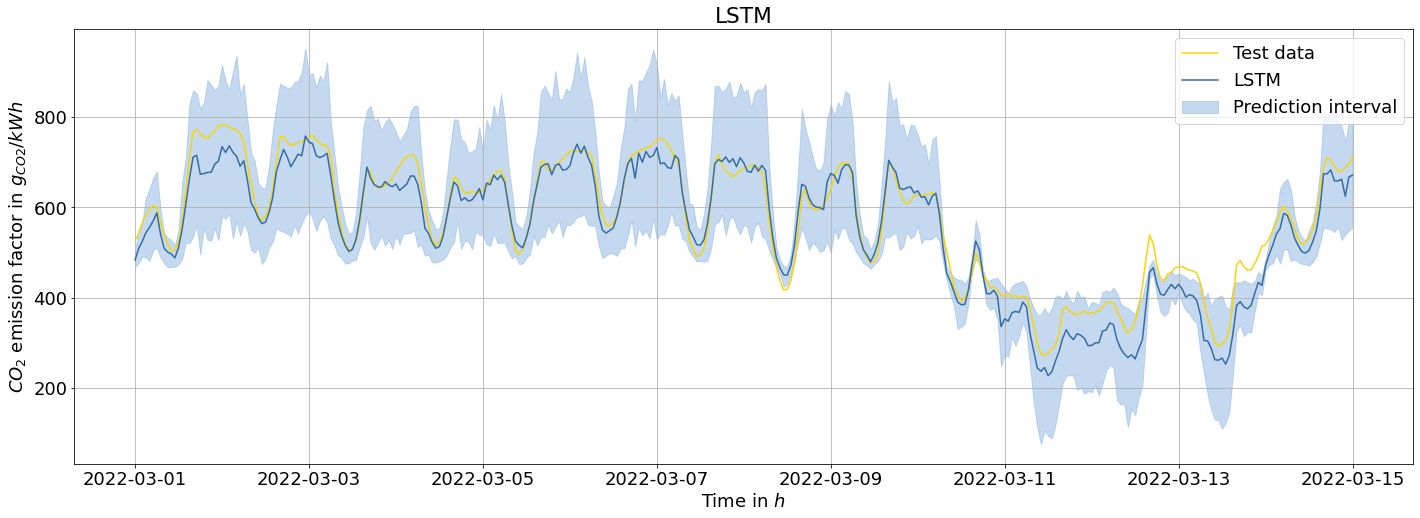

In [ ]:
fun.plot_model_uncertainty(co2_test, pred_test_df,lower_test_df ,upper_test_df, date_test, slice_start = '2022-03-01 00:00', slice_end =  '2022-03-15 00:00' , method = 'LSTM')

In [ ]:
mlp_test_df = pd.DataFrame(mlp_test)
mlp_test_df.head() 

,0
27215,367.332428
27216,391.313477
27217,380.028687
27218,359.016388
27219,354.795288
